In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
##Generating Data
features = np.genfromtxt("Aggregated_Data.csv", delimiter=",", usecols=(1, 3, 4, 5))
target = np.genfromtxt("Aggregated_Data.csv", delimiter=",", usecols=8)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.25, random_state=0)

Best Depth: 4


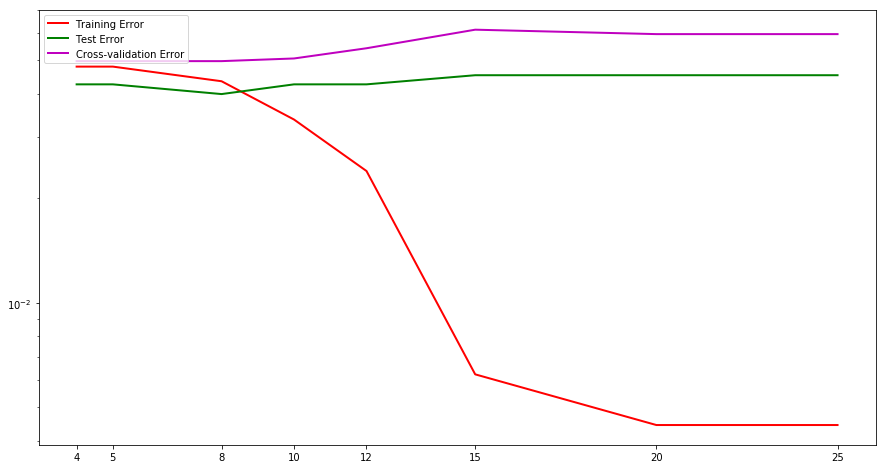

In [3]:
##Cross Validation
#Used from HW2 and Hirak's Discussion pdf
depths=[4,5,8,10,12,15,20,25]
err_train=[]
err_test=[]
for i, d in enumerate(depths):
    #Fit the model
    clf=RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0).fit(X_train, Y_train)
    #Predictions
    Ytr_pred = clf.predict(X_train)
    Yte_pred = clf.predict(X_test)
    err_train.append(mean_squared_error(Ytr_pred, Y_train))
    err_test.append(mean_squared_error(Yte_pred, Y_test))

def run_cv(d, n_folds, Xtr, Ytr):
    kf=KFold(n_splits=n_folds, shuffle=False)
    err_cv=[]
    for train_idx, test_idx in kf.split(Xtr, Ytr):
        Xtr_cv, Xte_cv=Xtr[train_idx], Xtr[test_idx]
        Ytr_cv, Yte_cv=Ytr[train_idx], Ytr[test_idx]
        clf=RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0).fit(Xtr_cv, Ytr_cv)
        # Make predictions on the test fold
        Y_pred=clf.predict(Xte_cv)
        # Return MSE on the test fold
        err_cv.append(mean_squared_error(Y_pred, Yte_cv))
    return np.mean(err_cv), 

n_folds = 5
err_cv = []
for d in depths:
    err_cv.append(run_cv(d, n_folds, X_train, Y_train))
plt.rcParams['figure.figsize']=(15.0,8.0)
plt.semilogy(depths,err_train,'r-',# training error (from P1)
             depths,err_test,'g-',# validation error (from P1)
             depths,err_cv,'m-',# cross-validation estimate of validation
             linewidth=2)
plt.xticks(depths)
plt.legend(['Training Error','Test Error','Cross-validation Error'],loc='upper left');
print("Best Depth:", depths[err_cv.index(min(err_cv))])

In [4]:
#Looked at the Random Forest documentation on the following link:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf.fit(X_train, Y_train)

print("Score:", clf.score(X_test, Y_test))

Score: 0.9573333333333334


Area Under the Curve: 0.6579038997214485


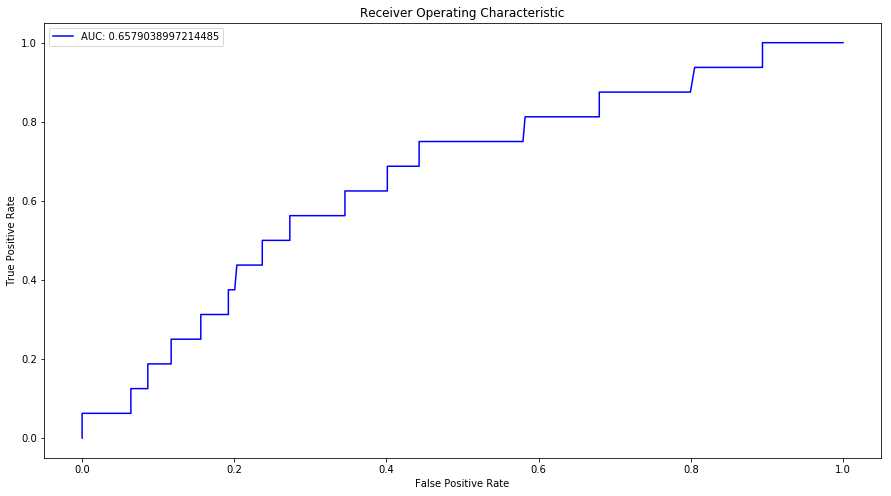

In [5]:
#Looked at the ROC Curve documentation on the following link:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf.fit(X_train, Y_train)
probs = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

#plt.rcParams['figure.figsize']=(15.0,8.0)
plt.title("Receiver Operating Characteristic")
plt.plot(fpr,tpr, c='b', label = "AUC: "+str(auc(fpr,tpr)))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
print("Area Under the Curve:", auc(fpr,tpr))
plt.legend()
plt.show()

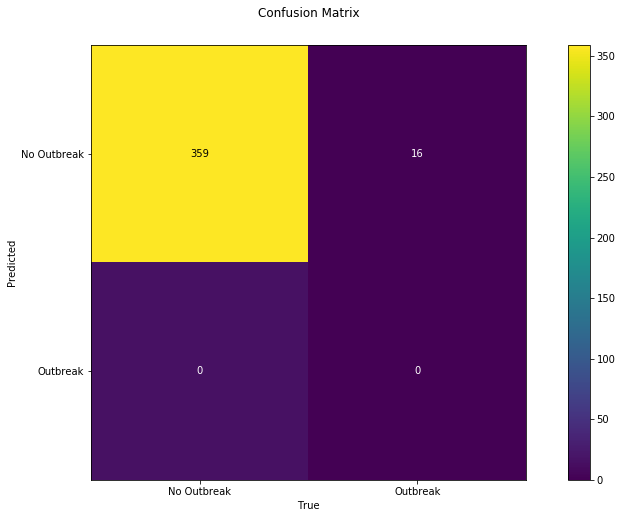

True Negative: 359
False Positive: 0
False Negative: 16
True Positive: 0



In [6]:
from sklearn.metrics import confusion_matrix

#Looked at the Confusion Matrix documentation on the following link:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

#Used the following link to help me plot:
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
##Plotting Confusion Matrix
labels = ["No Outbreak", "Outbreak"]
Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred, [0,1])
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.xaxis.tick_bottom()
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.text(0, 0, str(cm[0][0]), horizontalalignment="center", verticalalignment="center" ,color="black")
plt.text(0, 1, str(cm[0][1]), horizontalalignment="center", verticalalignment="center" ,color="white")
plt.text(1, 0, str(cm[1][0]), horizontalalignment="center", verticalalignment="center" ,color="white")
plt.text(1, 1, str(cm[1][1]), horizontalalignment="center", verticalalignment="center" ,color="white")
plt.show()

print("True Negative: {}\nFalse Positive: {}\nFalse Negative: {}\nTrue Positive: {}\n".format(cm[0][0], cm[0][1], cm[1][0], cm[1][1]))